In [6]:
# import libraries
import numpy as np
import pandas as pd
import nest_asyncio
nest_asyncio.apply()

import stan

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

from statsmodels.graphics.tsaplots import plot_acf

In [9]:
#import data
data_load = np.loadtxt('Series1.txt')

year  = data_load[:,0]
cycle = data_load[:,1]

df_sim = pd.DataFrame(data = {'t':year, 'y':cycle})

N_waves = 1


In [10]:
N = len(year)
freq = 1/11
dt = 1

# assign the data to the dictionary
data = {'n':N, 'y_obs':df_sim['y'].values,
        'N_waves':N_waves, 'freq':freq, 'dt':dt}

In [11]:
# define the program code for stan
code = """
data {

    int<lower=1> n;
    vector[n] y_obs;
    
    real<lower=0> dt;
    
    real<lower=0> freq;
}

parameters {

    ordered[n] t;

    real<lower=0> mean;
    real<lower=0, upper=0.1> sd;
    real<lower=10, upper=200> tau;

    real<lower=0, upper=0.1> sigma_y;

    real<lower=0> A;
    real phi;
    
}


model {
    // try with normal
    mean ~ normal(1,0.1);
    sd ~ uniform(0, 0.1);
    tau ~ uniform(10, 200);
    sigma_y ~ uniform(0, 0.1);
   
    t[1] ~ normal(0, 0.01);
    t[2] ~ normal(dt, 0.01); // a priori: t[0] + xi[0] with xi[0] ~ N(mu, sd)

    for (i in 1:n-2) {

      t[i+2] ~ normal(mean*(dt/tau) + (2 - dt/tau) * t[i+1] - (1 - dt/tau) * t[i], sd*sqrt(2*dt/tau));
    }

    vector[n] mean_y;

    for(i in 1:n) {
    
        mean_y[i] = A*cos(2*pi()*freq * t[i] + phi);
        
        y_obs[i] ~ normal(mean_y[i], sigma_y);
    }

}
"""

# build the model
posterior = stan.build(code, data=data, random_seed=12345)

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 

In file included from /home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/giovanni/.cache/httpstan/4.9.1/models/2tcyjj2h/model_2tcyjj2h.cpp:2:
/home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/mat

Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s


/home/giovanni/.cache/httpstan/4.9.1/models/2tcyjj2h/model_2tcyjj2h.cpp: In instantiation of ‘void model_2tcyjj2h_namespace::model_2tcyjj2h::transform_inits_impl(VecVar&, VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std::vector<int>; stan::require_vector_t<T_y>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/giovanni/.cache/httpstan/4.9.1/models/2tcyjj2h/model_2tcyjj2h.cpp:541:26:   required from here
/home/giovanni/.cache/httpstan/4.9.1/models/2tcyjj2h/model_2tcyjj2h.cpp:336:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
  336 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
In file included from /home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/sta

Building: 9.2s
Building: 9.3s


/home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl_ab(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double>; T3 = stan::math::var_value<double>; T_z = stan::math::var_value<double>; ScalarT = stan::math::var_value<double>; TupleT = std::tuple<stan::math::var_value<double, void>, stan::math::var_value<double, void>, stan::math::var_value<double, void> >]’:
/home/giovanni/.local/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:205:78:   required from ‘TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double

Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s
Building: 15.6s
Building: 15.7s
Building: 15.

Building: 21.0s, done.
Messages from stanc:
Warning in '/tmp/httpstan_vuceqqby/model_2tcyjj2h.stan', line 36, column 22: Argument
    0.01 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_vuceqqby/model_2tcyjj2h.stan', line 35, column 21: Argument
    0.01 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_vuceqqby/model_2tcyjj2h.stan', line 32, column 22: Argument
    200 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
    in its declaration. These hard constraints are not recommended, for two
    reasons: (a) Except when there are logical or physical constraints, it is
    very unusual for you to be sure that a parameter will fall inside a
    specified range, and (b) The infinite gradient induced by a h

# Inference

In [328]:
"""N = len(year)
freq = 1/11
dt = 1

# assign the data to the dictionary
data = {'n':N, 'y_obs':df_sim['y'].values,
        'N_waves':N_waves, 'freq':freq, 'dt':dt}"""

# sample from the model
n_chains = 4
n_warmup = 200
n_sample = 400

## Series 1

In [329]:
#import data
data_load = np.loadtxt('Data/Series1.txt')

year  = data_load[:,0]
cycle = data_load[:,1]

df_sim = pd.DataFrame(data = {'t':year, 'y':cycle})



fit = posterior.sample(num_chains=n_chains, num_samples=n_sample, num_warmup=n_warmup,
                       init=[{'A':10, 'phi':2,
                              't':df_sim['t'].values}]*n_chains)#,
                              #'mean':1, 
                              #'sd':0.05,
                              #'tau':100, 
                              #'sigma_y':0.05}]*n_chains)
print(fit)

Sampling:   0%
Sampling:   0% (1/2400)
Sampling:   0% (2/2400)
Sampling:   0% (3/2400)
Sampling:   0% (4/2400)
Sampling:   4% (103/2400)
Sampling:   8% (202/2400)
Sampling:  13% (301/2400)
Sampling:  17% (400/2400)
Sampling:  21% (500/2400)
Sampling:  21% (501/2400)
Sampling:  25% (601/2400)
Sampling:  25% (602/2400)
Sampling:  29% (703/2400)
Sampling:  34% (804/2400)
Sampling:  38% (903/2400)
Sampling:  42% (1002/2400)
Sampling:  46% (1101/2400)
Sampling:  50% (1200/2400)
Sampling:  54% (1300/2400)
Sampling:  58% (1400/2400)
Sampling:  62% (1500/2400)
Sampling:  67% (1600/2400)
Sampling:  71% (1700/2400)
Sampling:  75% (1800/2400)
Sampling:  79% (1900/2400)
Sampling:  83% (2000/2400)
Sampling:  88% (2100/2400)
Sampling:  92% (2200/2400)
Sampling:  96% (2300/2400)
Sampling: 100% (2400/2400)
Sampling: 100% (2400/2400), done.
Messages received during sampling:
  Gradient evaluation took 0.00082 seconds
  1000 transitions using 10 leapfrog steps per transition would take 8.2 seconds.
  Ad

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/tmp/httpstan_odo6rylx/model_fasytmlt.stan', line 40, column 6 to column 102)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/tmp/httpstan_odo6rylx/model_fasytmlt.stan', line 40, column 6 to column 102)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, 

<stan.Fit>
Parameters:
    t: (500,)
    mean: ()
    sd: ()
    tau: ()
    sigma_y: ()
    A: ()
    phi: ()
Draws: 1600


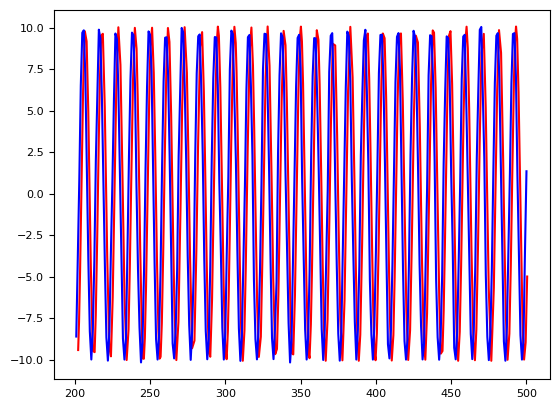

In [330]:
import matplotlib.pyplot as pl
t=fit["t"]
t_mean=np.mean(t,axis=1)

f = 200
t = 500

A=np.mean(fit["A"])
phi=np.mean(fit["phi"])

y = A*np.cos(2*np.pi*freq*t_mean + phi)

# denoised signal
plt.plot(t_mean[f:t],y[f:t],color="red")

# original signal
plt.plot(year[f:t],cycle[f:t],color="blue")
plt.show()

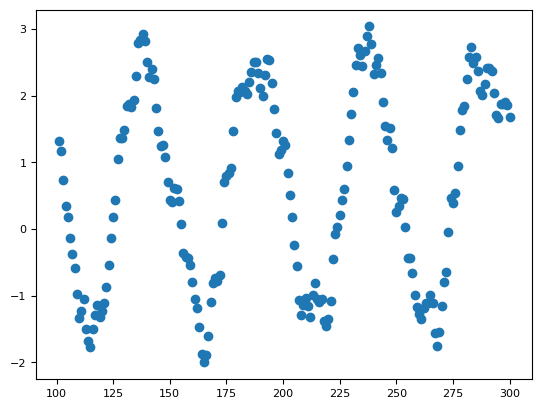

In [331]:
f = 100
t = 300

dif  = t_mean - year

plt.scatter(year[f:t],dif[f:t])
plt.show()

## Series 2

In [313]:
#import data
data_load = np.loadtxt('Data/Series2.txt')

year  = data_load[:,0]
cycle = data_load[:,1]

df_sim = pd.DataFrame(data = {'t':year, 'y':cycle})



fit = posterior.sample(num_chains=n_chains, num_samples=n_sample, num_warmup=n_warmup,
                       init=[{'A':10, 'phi':2,
                              't':df_sim['t'].values}]*n_chains)#,
                             # 'mean':100, 'sd':1, 'tau':1000, 'sigma_y':0.2}]*n_chains)
print(fit)

Sampling:   0%
Sampling:   0% (1/2400)
Sampling:   0% (2/2400)
Sampling:   0% (3/2400)
Sampling:   0% (4/2400)
Sampling:   4% (103/2400)
Sampling:   8% (202/2400)
Sampling:  13% (301/2400)
Sampling:  17% (400/2400)
Sampling:  21% (501/2400)
Sampling:  25% (601/2400)
Sampling:  29% (701/2400)
Sampling:  29% (702/2400)
Sampling:  29% (703/2400)
Sampling:  33% (803/2400)
Sampling:  34% (804/2400)
Sampling:  38% (903/2400)
Sampling:  42% (1002/2400)
Sampling:  46% (1101/2400)
Sampling:  50% (1200/2400)
Sampling:  54% (1300/2400)
Sampling:  58% (1400/2400)
Sampling:  62% (1500/2400)
Sampling:  67% (1600/2400)
Sampling:  71% (1700/2400)
Sampling:  75% (1800/2400)
Sampling:  79% (1900/2400)
Sampling:  83% (2000/2400)
Sampling:  88% (2100/2400)
Sampling:  92% (2200/2400)
Sampling:  96% (2300/2400)
Sampling: 100% (2400/2400)
Sampling: 100% (2400/2400), done.
Messages received during sampling:
  Gradient evaluation took 0.000879 seconds
  1000 transitions using 10 leapfrog steps per transition w

  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_fn950j58/model_roeaecy3.stan', line 40, column 6 to column 102)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_fn950j58/model_roeaecy3.stan', line 40, column 6 to column 102)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of t

<stan.Fit>
Parameters:
    t: (500,)
    mean: ()
    sd: ()
    tau: ()
    sigma_y: ()
    A: ()
    phi: ()
Draws: 1600


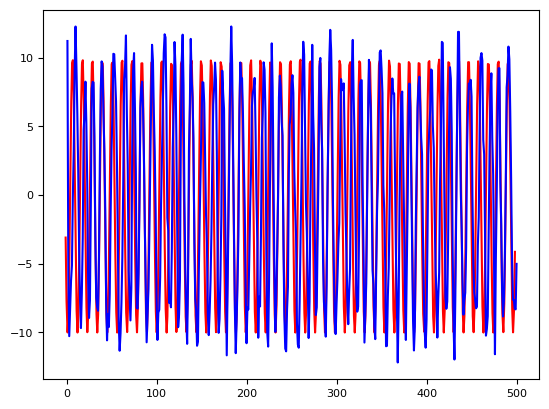

In [309]:
import matplotlib.pyplot as pl
t=fit["t"]
t_mean=np.mean(t,axis=1)-1

f = 0
t = 500

A=np.mean(fit["A"])
ph=np.mean(fit["phi"])

y = A*np.cos(2*np.pi*freq*t_mean + phi)

# denoised signal
plt.plot(t_mean[f:t],y[f:t],color="red")

# original signal
plt.plot(year[f:t],cycle[f:t],color="blue")
plt.show()

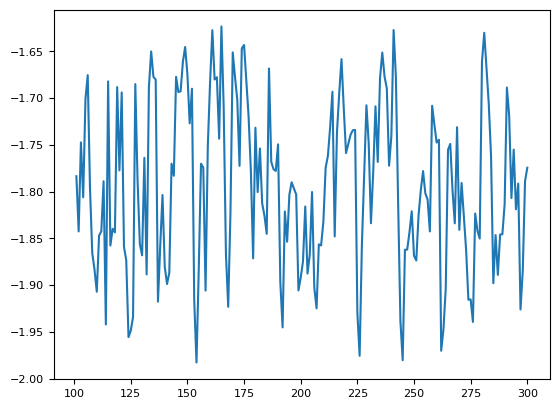

In [311]:
f = 100
t = 300

dif  = t_mean - year

plt.plot(year[f:t],dif[f:t])
plt.show()

1600


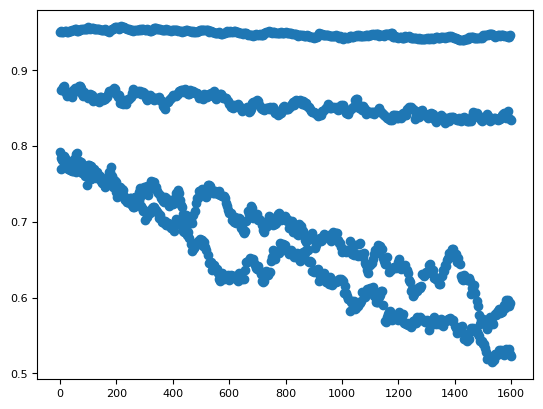

In [185]:
mean = fit["mean"]
print(len(mean[0]))
plt.scatter(np.arange(0, len(mean[0])), mean[0])

In [ ]:
import fft

# psd to see the frequencies before and after

## Series 3

In [142]:
#import data
data_load = np.loadtxt('Data/Series3.txt')

year  = data_load[:,0]
cycle = data_load[:,1]

df_sim = pd.DataFrame(data = {'t':year, 'y':cycle})



fit = posterior.sample(num_chains=n_chains, num_samples=n_sample, num_warmup=n_warmup,
                       init=[{'A':10, 'ph':2,
                              't':df_sim['t'].values}]*n_chains)#,
                             # 'mean':100, 'sd':1, 'tau':1000, 'sigma_y':0.2}]*n_chains)
print(fit)

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000887 seconds
  1000 transitions using 10 leapfrog steps per transition would take 8.87 seconds.
  Adjust your expectations accordingly!
           three stages of adaptation as currently configured.
           Reducing each adaptation stage to 15%/75%/10% of
           the given number of warmup iterations:
             init_buffer = 3
             adapt_window = 15
             term_buffer = 2
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is -11052, but must be positive! (in '/tmp/httpstan_44rfnlda/model_tuxxmfsl.stan', line 37, column 8 to column 46)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or

<stan.Fit>
Parameters:
    t: (500,)
    sigma_y: ()
    A: ()
    ph: ()
Draws: 80


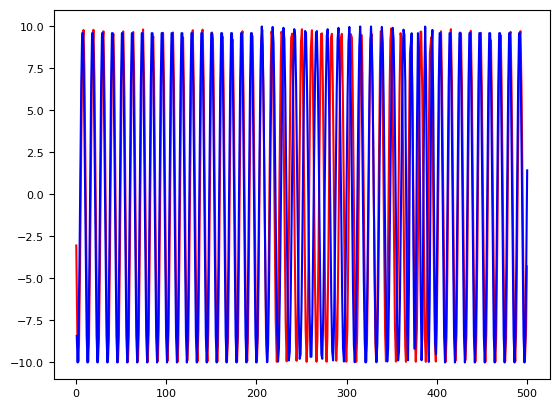

In [144]:
import matplotlib.pyplot as pl
t=fit["t"]
t_mean=np.mean(t,axis=1)-1

f = 0
t = 500

A=np.mean(fit["A"])
ph=np.mean(fit["ph"])

y = A*np.cos(2*np.pi*freq*t_mean + ph)

# denoised signal
plt.plot(t_mean[f:t],y[f:t],color="red")

# original signal
plt.plot(year[f:t],cycle[f:t],color="blue")
plt.show()

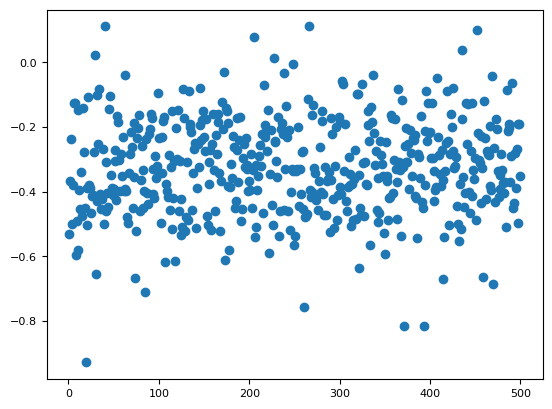

In [145]:
f = 0
t = 500

dif  = t_mean - year

plt.scatter(year[f:t],dif[f:t])
plt.show()

In [179]:
print(fit)

<stan.Fit>
Parameters:
    t: (500,)
    mean: ()
    sd: ()
    tau: ()
    sigma_y: ()
    A: ()
    phi: ()
Draws: 80


In [ ]:
#some stupid comment to test git